In [1]:
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt
import warnings
import scipy

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow 

print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))

seed = 1842
tensorflow.random.set_seed(seed)
np.random.seed(seed)
warnings.simplefilter('ignore')

Num GPUs Available:  1


In [2]:
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)


train_dataset = image_generator.flow_from_directory(batch_size=4,
                                                directory='data',
                                                shuffle=True,
                                                target_size=(300, 300), 
                                                subset="training",
                                                class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=4,
                                                directory='data',
                                                shuffle=True,
                                                target_size=(300, 300), 
                                                subset="validation",
                                                class_mode='categorical')

Found 6989 images belonging to 10 classes.
Found 1743 images belonging to 10 classes.


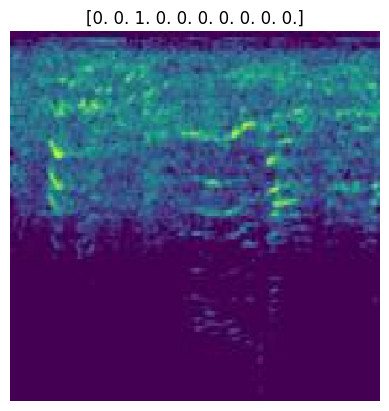

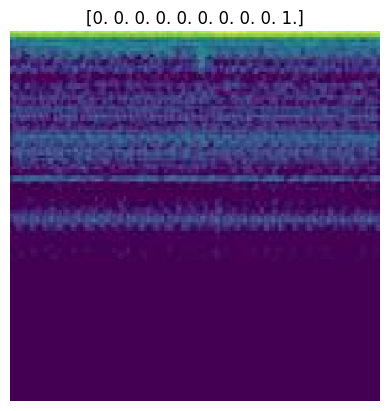

In [3]:
batch_1_img = train_dataset[0]
for i in range(0,2):
    img = batch_1_img[0][i]
    lab = batch_1_img[1][i]
    plt.imshow(img)
    plt.title(lab)
    plt.axis('off')
    plt.show()

In [4]:
model = keras.models.Sequential([ 

keras.layers.Flatten(input_shape = [300, 300,3]),                             
keras.layers.Dense(300, activation = 'relu' ),
keras.layers.Dropout(0.1),
keras.layers.Dense(400, activation = 'relu' ),
keras.layers.Dropout(0.1),
keras.layers.Dense(400, activation = 'relu' ),
keras.layers.Dropout(0.1),
keras.layers.Dense(400, activation = 'relu' ),
keras.layers.Dense(10, activation = 'softmax')])


model.compile(loss = tensorflow.losses.CategoricalCrossentropy(),
optimizer = 'adam',
metrics = ['accuracy'])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            restore_best_weights=True)

In [ ]:
model.fit(train_dataset, epochs=20, validation_data=validation_dataset, callbacks=callback)